In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# f1 = bukin n6
# f1 : [-15, -5] x [-3, 3] -> R
# f1(x,y) = ...
# min f1(x*)=0 for x*=(-10,1)

def bukin6(xx):
    x1, x2 = xx
    
    term1 = 100 * np.sqrt(np.abs(x2 - 0.01 * x1**2))
    term2 = 0.01 * np.abs(x1 + 10)

    return term1 + term2

# f2 = drop wave
# f2 : [-5.12, 5.12] x [-5.12, 5.12] -> R
# f2(x,y) = ...
# min f2(x*)=-1 for x*=(0,0)

def drop_wave(xx):
    x1 = xx[0]
    x2 = xx[1]

    term1 = 1 + np.cos(12 * np.sqrt(x1**2 + x2**2))
    term2 = 0.5 * (x1**2 + x2**2) + 2

    return - (term1 / term2)


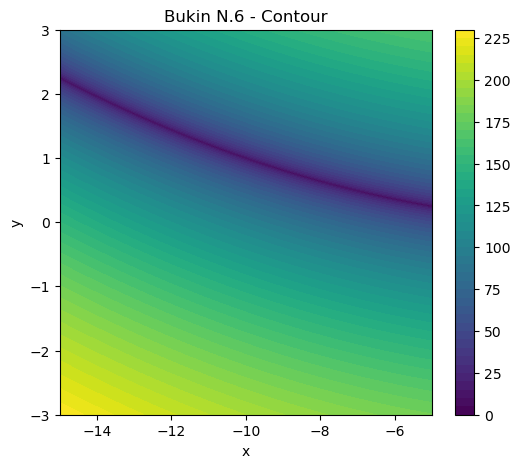

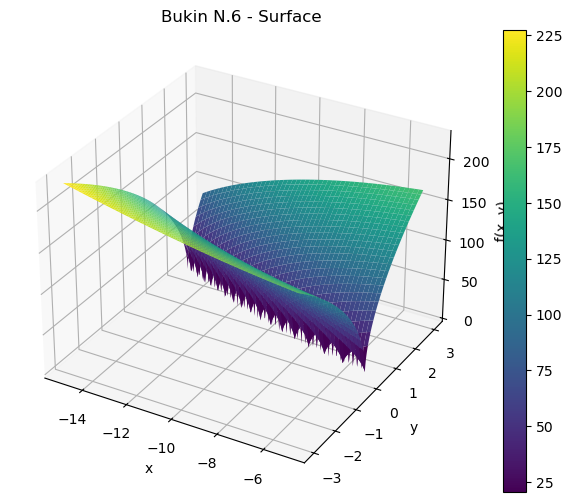

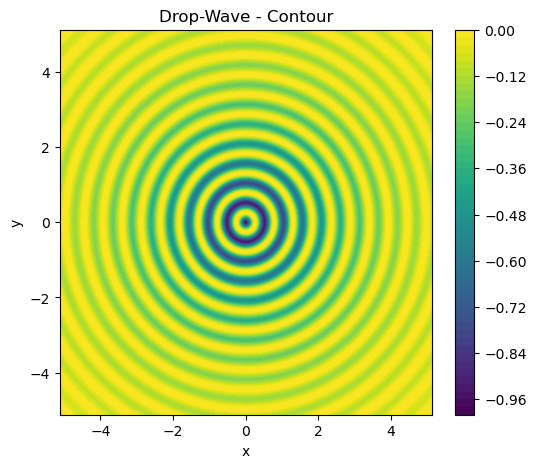

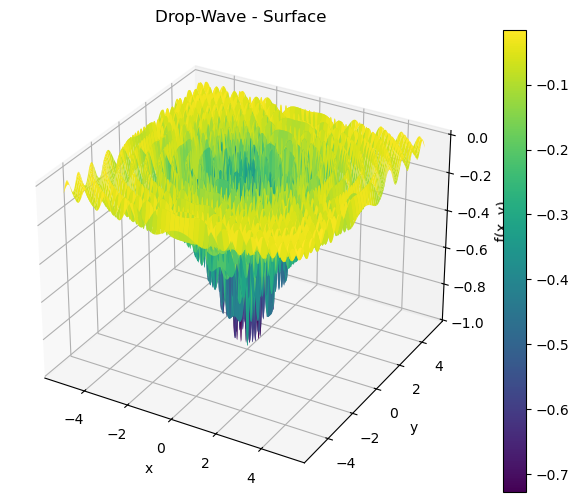

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_function(f, x_range, y_range, title):
    x = np.linspace(*x_range, 400)
    y = np.linspace(*y_range, 400)
    X, Y = np.meshgrid(x, y)
    Z = f([X, Y])

    # 2D Contour Plot
    plt.figure(figsize=(6, 5))
    cp = plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(cp)
    plt.title(f"{title} - Contour")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

    # 3D Surface Plot
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title(f"{title} - Surface")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    fig.colorbar(surf)
    plt.show()

# Plot Bukin N.6
plot_function(bukin6, x_range=(-15, -5), y_range=(-3, 3), title="Bukin N.6")

# Plot Drop-Wave
plot_function(drop_wave, x_range=(-5.12, 5.12), y_range=(-5.12, 5.12), title="Drop-Wave")


In [2]:
def initialize_population_real(bounds, population_size):
    dim = len(bounds)
    population = np.random.uniform(
        low=[b[0] for b in bounds],
        high=[b[1] for b in bounds],
        size=(population_size, dim)
    )
    return population

def initialize_population_binary(num_bits, population_size):
    return np.random.randint(0, 2, (population_size, num_bits))

In [3]:
def evaluate_population(population, fitness_function):
    return np.array([fitness_function((ind[0], ind[1])) for ind in population])


In [4]:
def arithmetic_crossover(parent1, parent2, alpha=0.7):
    child1 = alpha * parent1 + (1 - alpha) * parent2
    child2 = (1 - alpha) * parent1 + alpha * parent2
    return child1, child2

In [5]:
def blx_crossover(parent1, parent2, alpha=0.7):
    c_min = np.minimum(parent1, parent2)
    c_max = np.maximum(parent1, parent2)
    diff = c_max - c_min
    lower = c_min - alpha * diff
    upper = c_max + alpha * diff
    child1 = np.random.uniform(lower, upper)
    child2 = np.random.uniform(lower, upper)
    return child1, child2


In [6]:
def mutate(individual, mutation_rate, bounds):
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = np.random.uniform(bounds[i][0], bounds[i][1])
    return individual

In [7]:
def tournament_selection_one_ind(population, fitness, tournament_size=3):
    selected_indices = np.random.choice(len(population), tournament_size, replace=False)
    best_index = selected_indices[np.argmin(fitness[selected_indices])]
    return population[best_index]

In [8]:
def run_ga_real(
    fitness_function,
    bounds,
    population_size=50,
    generations=100,
    crossover_method='arithmetic',  # or 'blx'
    crossover_rate=0.9,
    mutation_rate=0.1,
    alpha=0.7,
    tournament_size=3,
):
    population = initialize_population_real(bounds, population_size)

    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    for gen in range(generations):
        fitness = evaluate_population(population, fitness_function)
        new_population = []

        while len(new_population) < population_size:
            parent1 = tournament_selection_one_ind(population, fitness, tournament_size)
            parent2 = tournament_selection_one_ind(population, fitness, tournament_size)

            if np.random.rand() < crossover_rate:
                if crossover_method == 'arithmetic':
                    child1, child2 = arithmetic_crossover(parent1, parent2, alpha)
                elif crossover_method == 'blx':
                    child1, child2 = blx_crossover(parent1, parent2, alpha)
            else:
                child1, child2 = parent1.copy(), parent2.copy()

            child1 = mutate(child1, mutation_rate, bounds)
            child2 = mutate(child2, mutation_rate, bounds)

            new_population.extend([child1, child2])

        population = np.array(new_population[:population_size])

        gen_best_idx = np.argmin(fitness)
        if fitness[gen_best_idx] < best_fitness:
            best_fitness = fitness[gen_best_idx]
            best_solution = population[gen_best_idx]

        fitness_history.append(best_fitness)

    return best_solution, best_fitness, fitness_history


Best solution: [-8.34676619  0.69668506]
Best fitness: 0.016778784656144668


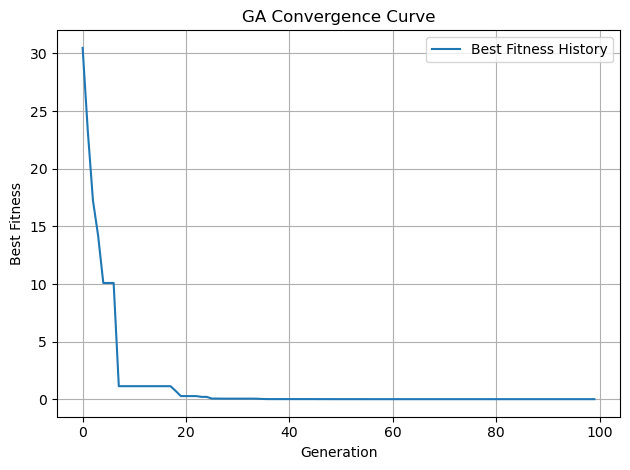

In [27]:
import matplotlib.pyplot as plt

bounds_bukin = [(-15, -5), (-3, 3)]
bounds_dropwave = [(-5.12, 5.12), (-5.12, 5.12)]

best_sol, best_fit, history = run_ga_real(
    fitness_function=bukin6,
    bounds=bounds_bukin,
    generations=100,
    crossover_method='blx',
    population_size=30,
    mutation_rate=0.1,
    crossover_rate=0.7,
    alpha=0.5,
    tournament_size=3
)

print("Best solution:", best_sol)
print("Best fitness:", best_fit)

plt.plot(history, label='Best Fitness History')
plt.title("GA Convergence Curve")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Best solution: [ 0.07051962 -0.51544179]
Best fitness: -0.9362453199476883


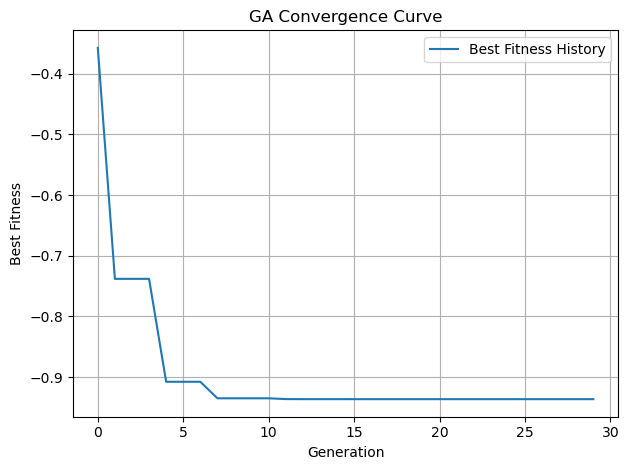

In [14]:
bounds_bukin = [(-15, -5), (-3, 3)]
bounds_dropwave = [(-5.12, 5.12), (-5.12, 5.12)]

best_sol, best_fit, history = run_ga_real(
    fitness_function=drop_wave,
    bounds=bounds_dropwave,
    generations=30,
    crossover_method='blx',
    population_size=30,
    mutation_rate=0.05,
    crossover_rate=0.9
)

print("Best solution:", best_sol)
print("Best fitness:", best_fit)
plt.plot(history, label='Best Fitness History')
plt.title("GA Convergence Curve")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Best solution: [-6.56992463  0.4316391 ]
Best fitness: 0.03430344755169765


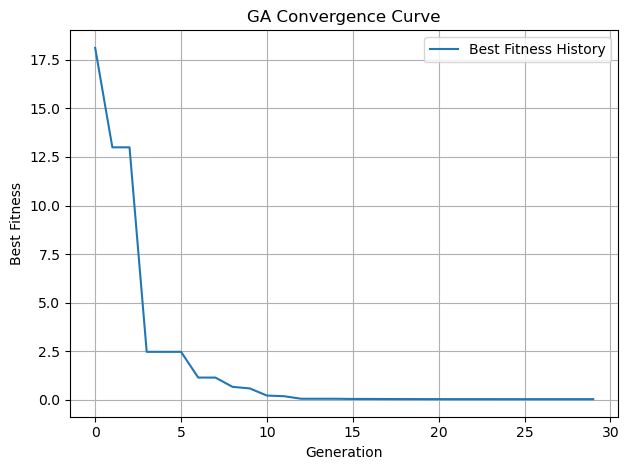

In [110]:
bounds_bukin = [(-15, -5), (-3, 3)]
bounds_dropwave = [(-5.12, 5.12), (-5.12, 5.12)]

best_sol, best_fit, history = run_ga_real(
    fitness_function=bukin6,
    bounds=bounds_bukin,
    generations=30,
    crossover_method='arithmetic',
    population_size=50,
    mutation_rate=0.05,
    crossover_rate=0.9
)

print("Best solution:", best_sol)
print("Best fitness:", best_fit)
plt.plot(history, label='Best Fitness History')
plt.title("GA Convergence Curve")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Best solution: [-0.01773857  0.51991304]
Best fitness: -0.9362453278079418


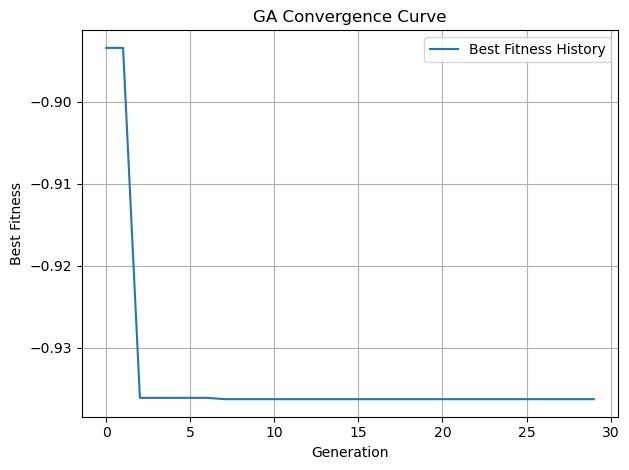

In [111]:
bounds_bukin = [(-15, -5), (-3, 3)]
bounds_dropwave = [(-5.12, 5.12), (-5.12, 5.12)]

best_sol, best_fit, history = run_ga_real(
    fitness_function=drop_wave,
    bounds=bounds_dropwave,
    generations=30,
    crossover_method='arithmetic',
    population_size=50,
    mutation_rate=0.05,
    crossover_rate=0.9
)

print("Best solution:", best_sol)
print("Best fitness:", best_fit)
plt.plot(history, label='Best Fitness History')
plt.title("GA Convergence Curve")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
def binary_to_real(binary, bounds, bits_per_var):
    decoded = []
    for i in range(len(bounds)):
        start = i * bits_per_var
        end = start + bits_per_var
        substr = binary[start:end]
        decimal = int("".join(str(b) for b in substr), 2)
        low, high = bounds[i]
        value = low + (decimal / (2**bits_per_var - 1)) * (high - low)
        decoded.append(value)
    return decoded

In [30]:
def one_point_crossover(p1, p2):
    point = np.random.randint(1, len(p1))
    return np.concatenate([p1[:point], p2[point:]]), np.concatenate([p2[:point], p1[point:]])

def two_point_crossover(p1, p2):
    pt1, pt2 = sorted(np.random.choice(range(len(p1)), 2, replace=False))
    return (
        np.concatenate([p1[:pt1], p2[pt1:pt2], p1[pt2:]]),
        np.concatenate([p2[:pt1], p1[pt1:pt2], p2[pt2:]])
    )

In [31]:
def mutate_binary(individual, mutation_rate):
    return np.array([1 - bit if np.random.rand() < mutation_rate else bit for bit in individual])


In [32]:
def run_ga_binary(
    fitness_function,
    bounds,
    bits_per_var=16,
    population_size=50,
    generations=100,
    crossover_method='one_point',  # or 'two_point'
    crossover_rate=0.9,
    mutation_rate=0.01,
    tournament_size=3,
):
    num_vars = len(bounds)
    population = initialize_population_binary(bits_per_var * num_vars, population_size)

    best_solution = None
    best_fitness = float('inf')
    fitness_history = []

    for gen in range(generations):
        decoded_population = np.array([binary_to_real(ind, bounds, bits_per_var) for ind in population])
        fitness = np.array([fitness_function((x[0], x[1])) for x in decoded_population])

        new_population = []

        while len(new_population) < population_size:
            parent1 = tournament_selection_one_ind(population, fitness, tournament_size)
            parent2 = tournament_selection_one_ind(population, fitness, tournament_size)

            if np.random.rand() < crossover_rate:
                if crossover_method == 'one_point':
                    child1, child2 = one_point_crossover(parent1, parent2)
                elif crossover_method == 'two_point':
                    child1, child2 = two_point_crossover(parent1, parent2)
            else:
                child1, child2 = parent1.copy(), parent2.copy()

            child1 = mutate_binary(child1, mutation_rate)
            child2 = mutate_binary(child2, mutation_rate)

            new_population.extend([child1, child2])

        population = np.array(new_population[:population_size])

        best_idx = np.argmin(fitness)
        if fitness[best_idx] < best_fitness:
            best_fitness = fitness[best_idx]
            best_solution = decoded_population[best_idx]

        fitness_history.append(best_fitness)

    return best_solution, best_fitness, fitness_history


Binary GA Best solution: [-14.84756237   2.20448615]
Binary GA Best fitness: 0.434885309867348


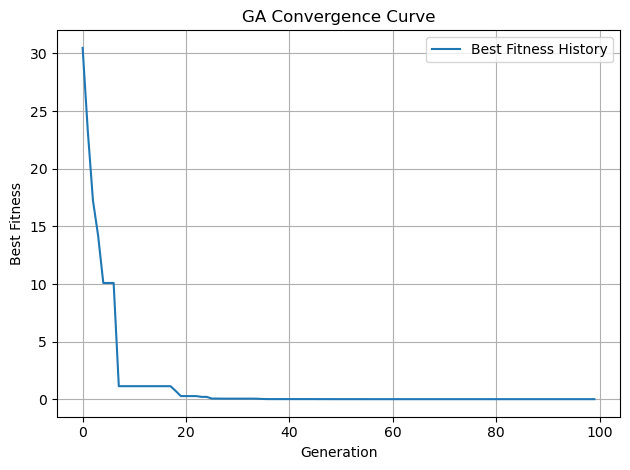

In [43]:
best_sol_bin, best_fit_bin, hist_bin = run_ga_binary(
    fitness_function=bukin6,
    bounds=bounds_bukin,
    crossover_method='two_point',
    mutation_rate=0.01,
    generations=30,
    population_size=100,
    crossover_rate=0.01
)

print("Binary GA Best solution:", best_sol_bin)
print("Binary GA Best fitness:", best_fit_bin)
plt.plot(history, label='Best Fitness History')
plt.title("GA Convergence Curve")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Binary GA Best solution: [-12.8844892    1.66010529]
Binary GA Best fitness: 0.24487055716002784


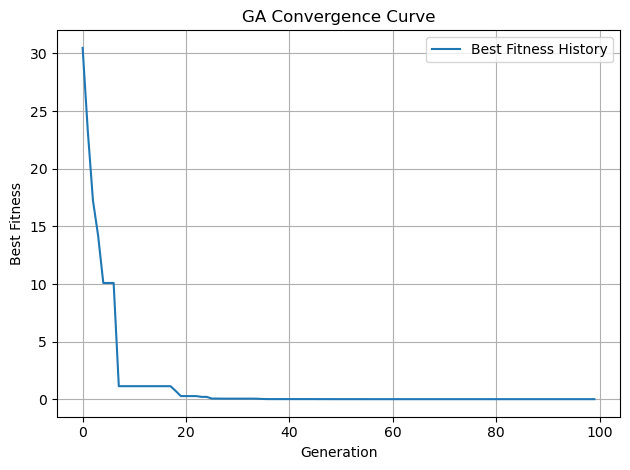

In [45]:
best_sol_bin, best_fit_bin, hist_bin = run_ga_binary(
    fitness_function=bukin6,
    bounds=bounds_bukin,
    crossover_method='one_point',
    mutation_rate=0.01,
    generations=30,
    population_size=100
)

print("Binary GA Best solution:", best_sol_bin)
print("Binary GA Best fitness:", best_fit_bin)
plt.plot(history, label='Best Fitness History')
plt.title("GA Convergence Curve")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [73]:
best_sol_bin, best_fit_bin, hist_bin = run_ga_binary(
    fitness_function=drop_wave,
    bounds=bounds_dropwave,
    crossover_method='two_point',
    mutation_rate=0.1,
    generations=100,
    crossover_rate=0.7
)

print("Binary GA Best solution:", best_sol_bin)
print("Binary GA Best fitness:", best_fit_bin)

Binary GA Best solution: [-0.02820356 -0.02789105]
Binary GA Best fitness: -0.944049369174712


Binary GA Best solution: [ 0.49571069 -0.15711177]
Binary GA Best fitness: -0.9362439321644979


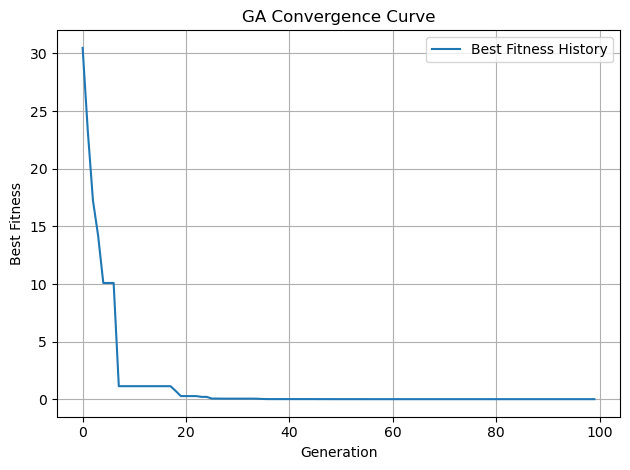

In [74]:
best_sol_bin, best_fit_bin, hist_bin = run_ga_binary(
    fitness_function=drop_wave,
    bounds=bounds_dropwave,
    crossover_method='one_point',
    mutation_rate=0.05,
    generations=30
)

print("Binary GA Best solution:", best_sol_bin)
print("Binary GA Best fitness:", best_fit_bin)
plt.plot(history, label='Best Fitness History')
plt.title("GA Convergence Curve")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [20]:
import pandas as pd

def log_results(function_name, encoding, crossover, results):
    df = pd.DataFrame(results, columns=['best_fitness'])
    df['function'] = function_name
    df['encoding'] = encoding
    df['crossover'] = crossover
    df['mean'] = df['best_fitness'].mean()
    df['std'] = df['best_fitness'].std()
    df['min'] = df['best_fitness'].min()
    return df


In [21]:
def run_experiments():
    all_results = []

    # Function info
    functions = {
        "bukin": (bukin6, [(-15, -5), (-3, 3)]),
        "drop_wave": (drop_wave, [(-100, 100), (-100, 100)])
    }

    reps = {
        "real": {
            "arithmetic": lambda func, bounds: run_ga_real(func, bounds, crossover_method='arithmetic'),
            "blx": lambda func, bounds: run_ga_real(func, bounds, crossover_method='blx')
        },
        "binary": {
            "one_point": lambda func, bounds: run_ga_binary(func, bounds, crossover_method='one_point'),
            "two_point": lambda func, bounds: run_ga_binary(func, bounds, crossover_method='two_point')
        }
    }

    for fname, (func, bounds) in functions.items():
        for enc_type, crossovers in reps.items():
            for crossover_name, runner in crossovers.items():
                print(f"Running: {fname}, {enc_type}, {crossover_name}")
                run_results = []

                for _ in range(30):
                    _, best_fit, _ = runner(func, bounds)
                    run_results.append([best_fit])

                df = log_results(fname, enc_type, crossover_name, run_results)
                all_results.append(df)

    final_df = pd.concat(all_results, ignore_index=True)
    final_df.to_csv("ga_experiment_results.csv", index=False)
    print("All experiments complete. Results saved to ga_experiment_results.csv.")


In [22]:
run_experiments()

Running: bukin, real, arithmetic
Running: bukin, real, blx
Running: bukin, binary, one_point
Running: bukin, binary, two_point
Running: drop_wave, real, arithmetic
Running: drop_wave, real, blx
Running: drop_wave, binary, one_point
Running: drop_wave, binary, two_point
All experiments complete. Results saved to ga_experiment_results.csv.


In [23]:
import pandas as pd
from scipy.stats import ttest_ind, f_oneway, wilcoxon
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("ga_experiment_results.csv")

# Verify structure
print(df.groupby(['function', 'encoding', 'crossover'])['best_fitness'].describe())


                               count      mean       std       min       25%  \
function  encoding crossover                                                   
bukin     binary   one_point    30.0  0.524818  1.125297  0.098691  0.235066   
                   two_point    30.0  0.512981  0.585996  0.096330  0.219362   
          real     arithmetic   30.0  0.167148  0.298127  0.003607  0.011066   
                   blx          30.0  0.020240  0.014318  0.001940  0.008633   
drop_wave binary   one_point    30.0 -0.874252  0.106561 -0.999831 -0.936245   
                   two_point    30.0 -0.838762  0.163611 -0.999831 -0.936245   
          real     arithmetic   30.0 -0.908016  0.067017 -0.986934 -0.936241   
                   blx          30.0 -0.950746  0.023453 -0.999250 -0.963889   

                                    50%       75%       max  
function  encoding crossover                                 
bukin     binary   one_point   0.291845  0.345240  6.293619  
             

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('ga_experiment_results.csv')

# Define groups
functions = ['bukin', 'drop_wave']
encodings = ['binary', 'real']
crossovers = {
    'binary': ['one_point', 'two_point'],
    'real': ['arithmetic', 'blx']
}

# Create plots for each function
for func in functions:
    # Set up figure with two subplots (one for each encoding)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
    axes = {'binary': ax1, 'real': ax2}
    
    # Plot for each encoding
    for enc in encodings:
        ax = axes[enc]
        for cross in crossovers[enc]:
            # Filter data for this group
            group_data = data[(data['function'] == func) & 
                            (data['encoding'] == enc) & 
                            (data['crossover'] == cross)]
            # Extract best_fitness values (30 runs)
            fitness_values = group_data['best_fitness'].values
            assert len(fitness_values) == 30, f"Expected 30 runs for {func}, {enc}, {cross}"
            
            # Plot line with markers
            runs = np.arange(1, 31)
            ax.plot(runs, fitness_values, marker='o', linestyle='-', 
                    label=f'{cross.replace("_", "-").title()}', 
                    markersize=4)
        
        # Customize subplot
        ax.set_title(f'{func.title()} ({enc.title()} Encoding)')
        ax.set_xlabel('Run Number')
        ax.set_ylabel('Best Fitness')
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Adjust y-axis for better visibility
        if func == 'bukin':
            ax.set_ylim(-0.1, 7)  # Bukin: fitness values range from ~0 to ~6
        elif func == 'drop_wave':
            ax.set_ylim(-1.1, -0.2)  # Drop-Wave: fitness values range from ~-1 to ~0
    
    # Adjust layout and add main title
    plt.suptitle(f'Best Fitness Across 30 Runs for {func.title()} Function', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save plot
    plt.savefig(f'{func}_fitness_plot.png', dpi=300, bbox_inches='tight')
    plt.close()

print("Plots saved as 'bukin_fitness_plot.png' and 'drop_wave_fitness_plot.png'.")

Plots saved as 'bukin_fitness_plot.png' and 'drop_wave_fitness_plot.png'.


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# Load the data
data = pd.read_csv('ga_experiment_results.csv')

def perform_t_test(group1, group2, group1_name, group2_name, function_name, comparison_type):
    """
    Perform a two-sample t-test using actual best_fitness values.
    """
    data1 = group1['best_fitness'].values
    data2 = group2['best_fitness'].values
    
    # Perform t-test (assuming equal variances; use equal_var=False for Welch's t-test if needed)
    t_stat, p_value = ttest_ind(data1, data2, equal_var=False)
    
    # Interpret results
    significance = "significant" if p_value < 0.05 else "not significant"
    print(f"\nT-test for {function_name} ({comparison_type}): {group1_name} vs. {group2_name}")
    print(f"T-statistic: {t_stat:.3f}")
    print(f"P-value: {p_value:.4f}")
    print(f"Conclusion: The difference is {significance} (p < 0.05).")
    
    return {
        'Function': function_name,
        'Comparison Type': comparison_type,
        'Comparison': f'{group1_name} vs. {group2_name}',
        'T-statistic': t_stat,
        'P-value': p_value
    }

# Initialize results list for t-tests
results = []

# T-tests for representations (binary vs. real)
for func in ['bukin', 'drop_wave']:
    # Filter data for the function
    func_data = data[data['function'] == func]
    
    # Compare binary vs. real encodings
    binary_data = func_data[func_data['encoding'] == 'binary']
    real_data = func_data[func_data['encoding'] == 'real']
    result = perform_t_test(binary_data, real_data, 'Binary', 'Real', func.title(), 'Representation')
    results.append(result)

# T-tests for crossovers (within encodings)
for func in ['bukin', 'drop_wave']:
    func_data = data[data['function'] == func]
    
    # Binary encoding: one_point vs. two_point
    binary_one_point = func_data[(func_data['encoding'] == 'binary') & (func_data['crossover'] == 'one_point')]
    binary_two_point = func_data[(func_data['encoding'] == 'binary') & (func_data['crossover'] == 'two_point')]
    result = perform_t_test(binary_one_point, binary_two_point, 'One-Point', 'Two-Point', func.title(), 'Crossover (Binary)')
    results.append(result)
    
    # Real encoding: arithmetic vs. blx
    real_arithmetic = func_data[(func_data['encoding'] == 'real') & (func_data['crossover'] == 'arithmetic')]
    real_blx = func_data[(func_data['encoding'] == 'real') & (func_data['crossover'] == 'blx')]
    result = perform_t_test(real_arithmetic, real_blx, 'Arithmetic', 'BLX', func.title(), 'Crossover (Real)')
    results.append(result)

# Save t-test results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv('t_test_results.csv', index=False)
print("\nT-test results saved to 't_test_results.csv'.")

# Plotting best_fitness across 30 runs for each group
functions = ['bukin', 'drop_wave']
encodings = ['binary', 'real']
crossovers = {
    'binary': ['one_point', 'two_point'],
    'real': ['arithmetic', 'blx']
}

for func in functions:
    # Set up figure with two subplots (one for each encoding)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
    axes = {'binary': ax1, 'real': ax2}
    
    # Plot for each encoding
    for enc in encodings:
        ax = axes[enc]
        for cross in crossovers[enc]:
            # Filter data for this group
            group_data = data[(data['function'] == func) & 
                            (data['encoding'] == enc) & 
                            (data['crossover'] == cross)]
            # Extract best_fitness values (30 runs)
            fitness_values = group_data['best_fitness'].values
            assert len(fitness_values) == 30, f"Expected 30 runs for {func}, {enc}, {cross}"
            
            # Plot line with markers
            runs = np.arange(1, 31)
            ax.plot(runs, fitness_values, marker='o', linestyle='-', 
                    label=f'{cross.replace("_", "-").title()}', 
                    markersize=4)
        
        # Customize subplot
        ax.set_title(f'{func.title()} ({enc.title()} Encoding)')
        ax.set_xlabel('Run Number')
        ax.set_ylabel('Best Fitness')
        ax.legend()
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Adjust y-axis for better visibility
        if func == 'bukin':
            ax.set_ylim(-0.1, 7)  # Bukin: fitness values range from ~0 to ~6
        elif func == 'drop_wave':
            ax.set_ylim(-1.1, -0.2)  # Drop-Wave: fitness values range from ~-1 to ~0
    
    # Adjust layout and add main title
    plt.suptitle(f'Best Fitness Across 30 Runs for {func.title()} Function', fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    
    # Save plot
    plt.savefig(f'{func}_fitness_plot.png', dpi=300, bbox_inches='tight')
    plt.close()

print("Plots saved as 'bukin_fitness_plot.png' and 'drop_wave_fitness_plot.png'.")


T-test for Bukin (Representation): Binary vs. Real
T-statistic: 3.593
P-value: 0.0006
Conclusion: The difference is significant (p < 0.05).

T-test for Drop_Wave (Representation): Binary vs. Real
T-statistic: 3.806
P-value: 0.0003
Conclusion: The difference is significant (p < 0.05).

T-test for Bukin (Crossover (Binary)): One-Point vs. Two-Point
T-statistic: 0.051
P-value: 0.9595
Conclusion: The difference is not significant (p < 0.05).

T-test for Bukin (Crossover (Real)): Arithmetic vs. BLX
T-statistic: 2.696
P-value: 0.0115
Conclusion: The difference is significant (p < 0.05).

T-test for Drop_Wave (Crossover (Binary)): One-Point vs. Two-Point
T-statistic: -0.996
P-value: 0.3243
Conclusion: The difference is not significant (p < 0.05).

T-test for Drop_Wave (Crossover (Real)): Arithmetic vs. BLX
T-statistic: 3.296
P-value: 0.0022
Conclusion: The difference is significant (p < 0.05).

T-test results saved to 't_test_results.csv'.
Plots saved as 'bukin_fitness_plot.png' and 'drop_wa